# Pandas Techniques for Data Manipulation in Python #

---

## Table of Contents ##

1. Introduction


2. Data Frame Construction


3. Dealing with Missing Values


    3.1 Checking Missing Values
    
    3.2 Missing Values Imputation
    
    
4. Filtering and Selecting Dataframe Columns


5. Selecting Specific Dataframe Rows


6. Plotting Dataframe
---

## 1. Introduction

Before any analysis can be performed on data the data has to be first cleaned and prepared for the analysis. This is done so because real world data is usually messy and in formats that are not suitable for analysis. thus, the first steps in any data analysis task is to first source the data in a format that is appropriate and then prepare it for the analysis. Pandas is a popular python library that is suitable for performaning the various data preparation. In this post we explore a number of Pandas techniques that we can perform in manipuolating data for various use.

---

## 2. Data Frame Construction

A Pandas Dataframe is a two dimentional data structure in form of a table that constitutes of rows and columns. The rows represents the observations in the dataset where as the columns are the features or atrributes of those individual columns.

The general syntax for creating a dataframe is using a DataFrame() function from the pandas library:

`pandas.DataFrame(data, index, columns)`

Where:
    
**`data`** is the data that we want to pass into a dataframe which can be a list, a dictionary, an array atc
    
**`index`** is a list of index values which by default runs from zero to n-1 with n being the number of observations

**`columns`** provides the column names to be passed to the dataframe. If not defined, the column names will be assigned from 0 to n-1 with n being number of columns

A Data Frame can be constructed from other data structures. We will look at constructing of dataframes from lists, dictionaries, arrays and importing from a csv file into a dataframe.

### 2.1 Creating Dataframe from Lists

In [14]:
#Import the Pandas Library
import pandas as pd

#list and index
data= [1, 2, 3, 4, 5]
index = ['A', 'B', 'C', 'D', 'E']

#pass the lists into a dataframe
#pass list 2 as a column and list1 as an index
df = pd.DataFrame(data=data, index=index, columns=['col1'])

#print dataframe
df.head()

,col1
A,1
B,2
C,3
D,4
E,5


### 2.2 Creating Dataframe from List of Lists

In [15]:
#Import the Pandas Library
import pandas as pd

#data containing list of lists
data = [["Jon", 38], ["Jane", 27], ["Allan", 22], ["Ken", 18], ["Mary", 24]]

#create dataframe
df = pd.DataFrame(data, columns=['Name', 'Age'])

df

,Name,Age
0,Jon,38
1,Jane,27
2,Allan,22
3,Ken,18
4,Mary,24


### 2.3 Creating a DataFrame from an Array

In [33]:
#Import the Pandas and Numpy Libraries
import pandas as pd
import numpy as np

#data containing an array
data = np.arange(40).reshape(10,4) #a 10 x 4 array

#create a dataframe
df = pd.DataFrame(data, columns=['c1', 'c2', 'c3', 'c4'])

#print the dataframe head
df.head()

,c1,c2,c3,c4
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


### 2.4 Creating a Dataframe from a Dictionary

When we pass a dictionary to a dataframe function, the dictionary keys are the columns and the values are the dataframe observations

In [34]:
#Import the Pandas and Numpy Libraries
import pandas as pd

#dictionary of names and ages
data = {'Name': ['Jon', 'Jane', 'Allan', 'Ken', 'Mary'],
       'Age': [38, 27, 22, 18, 24]}

#create dataframe from dictionary
df = pd.DataFrame(data)

#print dataframe
df

,Name,Age
0,Jon,38
1,Jane,27
2,Allan,22
3,Ken,18
4,Mary,24


### 2.5 Importing Dataframe from a csv

Data mainly come in various formats that needs to be imported into a dataframe using pandas. We will look at importing a dataframe from a csv file using the `pandas.read_csv(filepath)` function. the function has a number of arguments which includes specifying whether a csv has headers or not. However, the defult for these arguments will mostly do for csv files with headers and as such we need only specify the file path of the file we want to read in. 

We will load a csv file for data on different countries of the world into a pandas dataframe. The data is sourced from [kaggle](https://www.kaggle.com/datasets/fernandol/countries-of-the-world).

In [140]:
#Import the Pandas and Numpy Libraries
import pandas as pd

#read csv file
countries_df = pd.read_csv("data/countries.csv")

countries_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


---

## 3. Dealing with Missing Values

### 3.1 Checking Missing Values

The method `isna()` will return True for observations that have missing values and False for observations with data. We can use this method to check the total missing values in the data frame by using the sum() method to get the total number of missing values per column. 

In [25]:
#identify Missing Values per column
countries_df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [26]:
#get the total missing values in dataframe
sum(countries_df.isna().sum())

110

### 3.2 Missing Values Imputation

once we identify that we have missing values in our data we need to deal with them by either replacing them or removing them. We can use the `dropna()` method to drop all the rows that contain missing data. we can also use the `fillna()` method were we can define a value to use to to fill missing values or we can specify a method for filling missing data. The methods include ‘backfill’, ‘bfill’, ‘pad’, ‘ffill’. 

In [44]:
#forward fill the missing values
countries_df_clean = countries_df.fillna(method='ffill')

#get the total missing values in dataframe
display(sum(countries_df_clean.isna().sum()))

#display shape of dataframe
#no columns are droped
display(countries_df_clean.shape)

0

(227, 20)

In [45]:
#drop missing values
countries_df_clean_drop = countries_df.dropna()

#get the total missing values in dataframe
display(sum(countries_df_clean_drop.isna().sum()))

#display shape of dataframe
#missing columns are droped
display(countries_df_clean_drop.shape)

0

(179, 20)

---

## 4. Filtering and Selecting Dataframe Columns

Dataframe columns can be selected by using a dot and name of column after the dataframe name. This method is ideal for column names that do not contain spaces. The other method is to specify the column name or names is square brackets after a dataframe name.

We will use the countries_df_clean to select specific columns that we are intrested in working with.

In [46]:
countries_df_clean.head(3)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"


In [47]:
#selecting a column using 'dot'

countries_df_clean.Country

0         Afghanistan 
1             Albania 
2             Algeria 
3      American Samoa 
4             Andorra 
            ...       
222         West Bank 
223    Western Sahara 
224             Yemen 
225            Zambia 
226          Zimbabwe 
Name: Country, Length: 227, dtype: object

In [50]:
#selecting a column using square brackets
countries_df_clean['Country']

0         Afghanistan 
1             Albania 
2             Algeria 
3      American Samoa 
4             Andorra 
            ...       
222         West Bank 
223    Western Sahara 
224             Yemen 
225            Zambia 
226          Zimbabwe 
Name: Country, Length: 227, dtype: object

In [53]:
#the selection with a sigle pair of brackets returns an object
#to return a dataframe with specified column, use double square brackets
countries_df_clean[['Country']]

,Country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
222,West Bank
223,Western Sahara
224,Yemen
225,Zambia


In [103]:
#we can then select multiple columns by specifying a list of column names that we want to select

#list of columns to select
col_names = ['Country', 'Population', 'Region', 
             'Infant mortality (per 1000 births)', 
             'GDP ($ per capita)']

#select columns from dataframe
countries_df_selected = countries_df_clean[col_names]

#display head of dataframe
countries_df_selected.head()

,Country,Population,Region,Infant mortality (per 1000 births),GDP ($ per capita)
0,Afghanistan,31056997,ASIA (EX. NEAR EAST),"163,07",700.0
1,Albania,3581655,EASTERN EUROPE,"21,52",4500.0
2,Algeria,32930091,NORTHERN AFRICA,31,6000.0
3,American Samoa,57794,OCEANIA,"9,27",8000.0
4,Andorra,71201,WESTERN EUROPE,"4,05",19000.0


## 5. Selecting Specific Dataframe Rows

We can subset the dataframe to return only rows with specific conditions by using conditional operations such as `==, !=, <=, >=, <, >` for columns with numerical data types. We can use `isin` to selcet columns with strings within a specified list. These can be accompained by `&` for AND and `|` for OR operators so as to specify multiple conditions.

In [124]:
#select observations with GDP of over 20,000 U$D

countries_20GDP = countries_df_selected[countries_df_selected
                                        ['GDP ($ per capita)']>=20000]
countries_20GDP.head()

,Country,Population,Region,Infant mortality (per 1000 births),GDP ($ per capita)
10,Aruba,71891,LATIN AMER. & CARIB,"5,89",28000.0
11,Australia,20264082,OCEANIA,"4,69",29000.0
12,Austria,8192880,WESTERN EUROPE,"4,66",30000.0
19,Belgium,10379067,WESTERN EUROPE,"4,68",29100.0
22,Bermuda,65773,NORTHERN AMERICA,"8,53",36000.0


In [157]:
#select observations with GDP of over 20,000 U$D and Population of 1 million or less

countries_20GDP_1milPop = countries_df_selected[(countries_df_selected['GDP ($ per capita)']>=20000) &
                                        (countries_df_selected['Population']<=1000000)]
countries_20GDP_1milPop

,Country,Population,Region,Infant mortality (per 1000 births),GDP ($ per capita)
10,Aruba,71891,LATIN AMER. & CARIB,"5,89",28000.0
22,Bermuda,65773,NORTHERN AMERICA,"8,53",36000.0
38,Cayman Islands,45436,LATIN AMER. & CARIB,"8,19",35000.0
66,Faroe Islands,47246,WESTERN EUROPE,"6,24",22000.0
80,Greenland,56361,NORTHERN AMERICA,"15,82",20000.0
83,Guam,171019,OCEANIA,"6,94",21000.0
85,Guernsey,65409,WESTERN EUROPE,"4,71",20000.0
93,Iceland,299388,WESTERN EUROPE,"3,31",30900.0
99,Isle of Man,75441,WESTERN EUROPE,"5,93",21000.0
104,Jersey,91084,WESTERN EUROPE,"5,24",24800.0


---

## 6. Ploting Dataframes

Dataframe columns can be ploted by using the `plot()` method on a dataframe and specifying the column names to plot and the type of plot. The general syntax is as follows:

`df.plot(kind, x, y, color)`

Were:

**`df`** is the name of a dataframe
**`kind`** is the kind of plot
**`x` and `y`** are the column names for the x and y values
**`color`** is the color of the plot

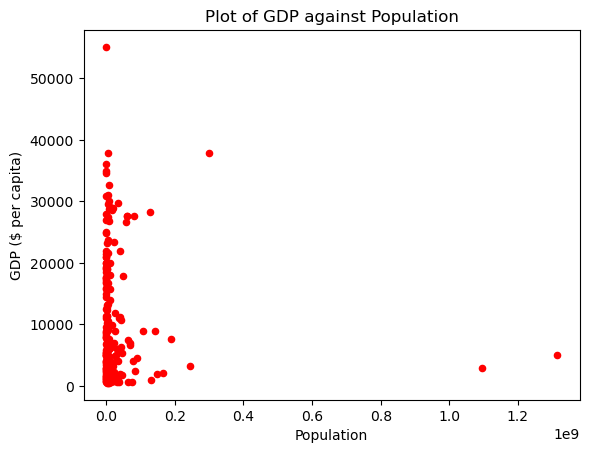

In [161]:
#import pyploy from matplotlib
import matplotlib.pyplot as plt

#plot scatterplot of GDP and Population
countries_df_selected.plot(kind = 'scatter',
                          x = 'Population',
                          y = 'GDP ($ per capita)',
                          color = 'red')

#add title
plt.title("Plot of GDP against Population")
plt.show()

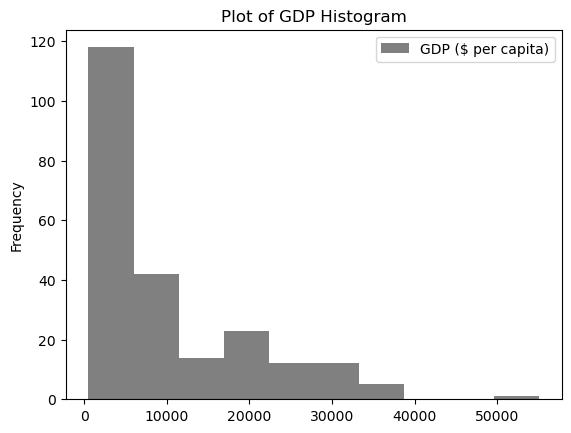

In [162]:
#Histogram Plot of GDP
countries_df_selected.plot(kind = 'hist',
                          y = 'GDP ($ per capita)',
                          color = 'gray')

#add title
plt.title("Plot of GDP Histogram")
plt.show()